<center><h1>Wang_Jason_HW4</h1></center>
<br>
<br>

Name: Jason Wang
<br>
Github Username: jasonwangg1321 
<br>
USC ID: 5363148736

## 1. Time Series Classification Part 1: Feature Creation/Extraction (HW3 Rerun)

### (a) Obtain Data

Import packages

In [1]:
# pip install natsort
# pip install imblearn

In [2]:
import pandas as pd
import os
import natsort
from scipy.stats import bootstrap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV




Get the AReM Data Set

In [3]:
# Bending Dataset 4 has been cleaned to be comma separated values.
# Other trailing commas have been removed.


### (b) Splitting Data

In [4]:
# keep datasets 1 and 2 in folders bending1, bending 2.
# Datasets 1,2,3 in other folders as test data.
# other datasets as training data
def split(paths):
    bending1 = 'bending1'
    bending2 = 'bending2'
    training = []
    test = []
    for folder in paths:
        folder_path = os.path.join(os.getcwd(),folder)  # learned os commands from chatgpt
        files = natsort.natsorted(os.listdir(folder_path)) # natsort to sort files so dataset2.csv comes before dataset10.csv
        files = [os.path.join(folder_path,file) for file in files]

        for j, file_path in enumerate(files, start = 1):
            if (folder == bending1 or folder == bending2) and j <3:
                test.append(file_path)
            elif (folder != bending1 and folder != bending2) and j < 4:
                test.append(file_path)
            else:
                training.append(file_path)

    return training,test

folders = ['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']
all_training = []
all_test = []

training, test = split(folders)
all_training.append(training)
all_test.append(test)
print(all_test)

[['c:\\Users\\19092\\Desktop\\DSCI 552\\AREM\\bending1\\dataset1.csv', 'c:\\Users\\19092\\Desktop\\DSCI 552\\AREM\\bending1\\dataset2.csv', 'c:\\Users\\19092\\Desktop\\DSCI 552\\AREM\\bending2\\dataset1.csv', 'c:\\Users\\19092\\Desktop\\DSCI 552\\AREM\\bending2\\dataset2.csv', 'c:\\Users\\19092\\Desktop\\DSCI 552\\AREM\\cycling\\dataset1.csv', 'c:\\Users\\19092\\Desktop\\DSCI 552\\AREM\\cycling\\dataset2.csv', 'c:\\Users\\19092\\Desktop\\DSCI 552\\AREM\\cycling\\dataset3.csv', 'c:\\Users\\19092\\Desktop\\DSCI 552\\AREM\\lying\\dataset1.csv', 'c:\\Users\\19092\\Desktop\\DSCI 552\\AREM\\lying\\dataset2.csv', 'c:\\Users\\19092\\Desktop\\DSCI 552\\AREM\\lying\\dataset3.csv', 'c:\\Users\\19092\\Desktop\\DSCI 552\\AREM\\sitting\\dataset1.csv', 'c:\\Users\\19092\\Desktop\\DSCI 552\\AREM\\sitting\\dataset2.csv', 'c:\\Users\\19092\\Desktop\\DSCI 552\\AREM\\sitting\\dataset3.csv', 'c:\\Users\\19092\\Desktop\\DSCI 552\\AREM\\standing\\dataset1.csv', 'c:\\Users\\19092\\Desktop\\DSCI 552\\AREM\\sta

In [5]:
test_list = []
for files in all_test:
    for file in files:
        test_df = pd.read_csv(file, skiprows = 4)
        #print(test_df)
        test_list.append(test_df)
full_test = pd.concat(test_list, ignore_index= True)
full_test['test'] = 1
display(full_test)

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,test
0,0,39.25,0.43,22.75,0.43,33.75,1.30,1
1,250,39.25,0.43,23.00,0.00,33.00,0.00,1
2,500,39.25,0.43,23.25,0.43,33.00,0.00,1
3,750,39.50,0.50,23.00,0.71,33.00,0.00,1
4,1000,39.50,0.50,24.00,0.00,33.00,0.00,1
...,...,...,...,...,...,...,...,...
9115,118750,36.00,2.45,17.00,5.10,20.50,0.87,1
9116,119000,34.33,1.89,15.00,2.45,17.00,2.12,1
9117,119250,33.00,7.35,14.60,3.14,13.00,5.70,1
9118,119500,31.67,1.25,11.00,6.16,19.25,2.17,1


In [6]:
training_list = []
for files in all_training:
    for file in files:
        print(file)
        try:
            training_df = pd.read_csv(file, skiprows = 4)
            training_list.append(training_df)
        except pd.errors.ParserError as e:
            print(f'{file}')
            #print(e)
full_training = pd.concat(training_list, ignore_index= True)
full_training['test'] = 0
display(full_training)

c:\Users\19092\Desktop\DSCI 552\AREM\bending1\dataset3.csv
c:\Users\19092\Desktop\DSCI 552\AREM\bending1\dataset4.csv
c:\Users\19092\Desktop\DSCI 552\AREM\bending1\dataset5.csv
c:\Users\19092\Desktop\DSCI 552\AREM\bending1\dataset6.csv
c:\Users\19092\Desktop\DSCI 552\AREM\bending1\dataset7.csv
c:\Users\19092\Desktop\DSCI 552\AREM\bending2\dataset3.csv
c:\Users\19092\Desktop\DSCI 552\AREM\bending2\dataset4.csv
c:\Users\19092\Desktop\DSCI 552\AREM\bending2\dataset5.csv
c:\Users\19092\Desktop\DSCI 552\AREM\bending2\dataset6.csv
c:\Users\19092\Desktop\DSCI 552\AREM\cycling\dataset4.csv
c:\Users\19092\Desktop\DSCI 552\AREM\cycling\dataset5.csv
c:\Users\19092\Desktop\DSCI 552\AREM\cycling\dataset6.csv
c:\Users\19092\Desktop\DSCI 552\AREM\cycling\dataset7.csv
c:\Users\19092\Desktop\DSCI 552\AREM\cycling\dataset8.csv
c:\Users\19092\Desktop\DSCI 552\AREM\cycling\dataset9.csv
c:\Users\19092\Desktop\DSCI 552\AREM\cycling\dataset10.csv
c:\Users\19092\Desktop\DSCI 552\AREM\cycling\dataset11.csv
c:\

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,test
0,0,42.00,0.71,21.25,0.43,30.00,0.00,0
1,250,41.50,0.50,20.25,1.48,31.25,1.09,0
2,500,41.50,0.50,14.25,1.92,33.00,0.00,0
3,750,40.75,0.83,15.75,0.43,33.00,0.00,0
4,1000,40.00,0.71,20.00,2.74,32.75,0.43,0
...,...,...,...,...,...,...,...,...
33114,118750,34.50,6.18,9.00,3.56,12.67,4.19,0
33115,119000,25.75,6.02,13.75,2.05,16.00,1.58,0
33116,119250,31.50,3.35,10.25,5.12,16.25,2.95,0
33117,119500,33.75,2.77,14.00,3.24,13.75,0.43,0


### (c) Feature Extraction

In [7]:
print(training)

['c:\\Users\\19092\\Desktop\\DSCI 552\\AREM\\bending1\\dataset3.csv', 'c:\\Users\\19092\\Desktop\\DSCI 552\\AREM\\bending1\\dataset4.csv', 'c:\\Users\\19092\\Desktop\\DSCI 552\\AREM\\bending1\\dataset5.csv', 'c:\\Users\\19092\\Desktop\\DSCI 552\\AREM\\bending1\\dataset6.csv', 'c:\\Users\\19092\\Desktop\\DSCI 552\\AREM\\bending1\\dataset7.csv', 'c:\\Users\\19092\\Desktop\\DSCI 552\\AREM\\bending2\\dataset3.csv', 'c:\\Users\\19092\\Desktop\\DSCI 552\\AREM\\bending2\\dataset4.csv', 'c:\\Users\\19092\\Desktop\\DSCI 552\\AREM\\bending2\\dataset5.csv', 'c:\\Users\\19092\\Desktop\\DSCI 552\\AREM\\bending2\\dataset6.csv', 'c:\\Users\\19092\\Desktop\\DSCI 552\\AREM\\cycling\\dataset4.csv', 'c:\\Users\\19092\\Desktop\\DSCI 552\\AREM\\cycling\\dataset5.csv', 'c:\\Users\\19092\\Desktop\\DSCI 552\\AREM\\cycling\\dataset6.csv', 'c:\\Users\\19092\\Desktop\\DSCI 552\\AREM\\cycling\\dataset7.csv', 'c:\\Users\\19092\\Desktop\\DSCI 552\\AREM\\cycling\\dataset8.csv', 'c:\\Users\\19092\\Desktop\\DSCI 552\\

In [8]:
# min, max, mean, median, standard deviation, first, third quartile
all_data = []
all_data.extend(test)
all_data.extend(training)
all_features = []

for i, file in enumerate(all_data, start= 1):
    df = pd.read_csv(file, skiprows =4, usecols=[1,2,3,4,5,6])
    mini = df.min(axis=0)
    maxi = df.max(axis = 0)
    mean = df.median(axis=0)
    median = df.median(axis=0)
    sd = df.std(axis=0)
    first_quart = df.quantile(.25, axis=0)
    third_quart = df.quantile(.75, axis=0)
    dataset = pd.concat([mini, maxi, mean, median, sd, first_quart, third_quart], axis=0).to_frame().T # line to concat dataset was from chatgpt as I was having trouble figuring how to to correctly concat my data
    columns = [f'min_{i}' for i in range(1, 7)] + \
          [f'max_{i}' for i in range(1, 7)] + \
          [f'mean_{i}' for i in range(1, 7)] + \
          [f'median_{i}' for i in range(1, 7)] + \
          [f'sd_{i}' for i in range(1, 7)] + \
          [f'first_quart_{i}' for i in range(1, 7)] + \
          [f'third_quart_{i}' for i in range(1, 7)]   
    dataset.columns = columns
    all_features.append(dataset)

all_features_df = pd.concat(all_features)
all_features_df_instance = all_features_df
all_features_df_instance['instance'] = range(1,len(all_features_df_instance) + 1)
# all_features_df_instance


In [9]:
training_data = []
training_features = []

for i, file in enumerate(training, start= 1):
    df = pd.read_csv(file, skiprows =4, usecols=[1,2,3,4,5,6])
    mini = df.min(axis=0)
    maxi = df.max(axis = 0)
    mean = df.median(axis=0)
    median = df.median(axis=0)
    sd = df.std(axis=0)
    first_quart = df.quantile(.25, axis=0)
    third_quart = df.quantile(.75, axis=0)
    training_dataset = pd.concat([mini, maxi, mean, median, sd, first_quart, third_quart], axis=0).to_frame().T # line to concat dataset was from chatgpt as I was having trouble figuring how to to correctly concat my data
    columns = [f'min_{i}' for i in range(1, 7)] + \
          [f'max_{i}' for i in range(1, 7)] + \
          [f'mean_{i}' for i in range(1, 7)] + \
          [f'median_{i}' for i in range(1, 7)] + \
          [f'sd_{i}' for i in range(1, 7)] + \
          [f'first_quart_{i}' for i in range(1, 7)] + \
          [f'third_quart_{i}' for i in range(1, 7)]   
    training_dataset.columns = columns
    training_features.append(training_dataset)

training_features_df = pd.concat(training_features)
training_features_df_instance = training_features_df
training_features_df_instance['instance'] = range(1,len(training_features_df_instance) + 1)
training_features_df_instance['test'] = 0
training_features_df_instance

,min_1,min_2,min_3,min_4,min_5,min_6,max_1,max_2,max_3,max_4,...,first_quart_5,first_quart_6,third_quart_1,third_quart_2,third_quart_3,third_quart_4,third_quart_5,third_quart_6,instance,test
0,35.00,0.0,6.50,0.0,29.00,0.00,47.40,1.70,29.75,4.44,...,35.3625,0.0000,45.0000,0.5000,24.0000,0.8300,36.50,0.9400,1,0
0,33.00,0.0,8.50,0.0,20.00,0.00,47.75,3.00,30.00,5.15,...,30.4575,0.0000,45.0000,1.1200,24.3725,1.3000,36.33,1.0000,2,0
0,33.00,0.0,3.00,0.0,23.67,0.00,45.75,2.83,28.25,6.42,...,28.4575,0.0000,42.7500,0.7100,22.0625,1.1200,31.25,0.5000,3,0
0,37.00,0.0,5.75,0.0,8.00,0.00,48.00,1.58,27.00,10.03,...,22.2500,0.4300,45.0000,0.5000,18.2700,1.1200,24.00,0.8700,4,0
0,36.25,0.0,1.50,0.0,11.33,0.00,48.00,1.50,26.33,5.17,...,20.5000,0.0000,44.6700,0.5000,18.0000,0.9400,23.75,0.8300,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,19.50,0.0,7.33,0.0,6.33,0.00,45.33,14.67,23.25,9.00,...,13.7300,2.0500,37.0000,6.1050,17.2700,4.2600,18.25,4.3225,65,0
0,19.75,0.0,6.25,0.0,6.25,0.00,45.50,13.47,22.25,9.00,...,13.5000,2.1575,38.0000,5.9700,17.0000,4.3900,17.75,4.5650,66,0
0,19.50,0.0,7.00,0.0,7.00,0.00,46.00,12.47,22.67,8.34,...,14.0000,2.1600,37.8125,5.8000,17.0000,4.1100,17.75,4.3350,67,0
0,23.50,0.0,6.67,0.0,5.50,0.00,46.25,14.82,24.25,9.90,...,13.7500,2.1700,38.2500,5.9325,17.2500,4.1900,18.00,4.5000,68,0


In [10]:
test_data = []
test_features = []

for i, file in enumerate(test, start= 1):
    df = pd.read_csv(file, skiprows =4, usecols=[1,2,3,4,5,6])
    mini = df.min(axis=0)
    maxi = df.max(axis = 0)
    mean = df.median(axis=0)
    median = df.median(axis=0)
    sd = df.std(axis=0)
    first_quart = df.quantile(.25, axis=0)
    third_quart = df.quantile(.75, axis=0)
    test_dataset = pd.concat([mini, maxi, mean, median, sd, first_quart, third_quart], axis=0).to_frame().T # line to concat dataset was from chatgpt as I was having trouble figuring how to to correctly concat my data
    columns = [f'min_{i}' for i in range(1, 7)] + \
          [f'max_{i}' for i in range(1, 7)] + \
          [f'mean_{i}' for i in range(1, 7)] + \
          [f'median_{i}' for i in range(1, 7)] + \
          [f'sd_{i}' for i in range(1, 7)] + \
          [f'first_quart_{i}' for i in range(1, 7)] + \
          [f'third_quart_{i}' for i in range(1, 7)]   
    test_dataset.columns = columns
    test_features.append(test_dataset)

test_features_df = pd.concat(test_features)
test_features_df_instance = test_features_df
test_features_df_instance['instance'] = range(1,len(test_features_df_instance) + 1)
test_features_df_instance['test'] = 1
test_features_df_instance

,min_1,min_2,min_3,min_4,min_5,min_6,max_1,max_2,max_3,max_4,...,first_quart_5,first_quart_6,third_quart_1,third_quart_2,third_quart_3,third_quart_4,third_quart_5,third_quart_6,instance,test
0,37.25,0.0,4.00,0.0,27.25,0.0,45.00,1.30,29.50,7.23,...,33.0000,0.0000,42.0000,0.5000,23.25,1.1200,36.0000,1.300,1,1
0,38.00,0.0,2.00,0.0,27.67,0.0,45.67,1.22,29.50,5.76,...,32.0000,0.0000,43.6700,0.5000,22.25,1.1450,34.5000,1.300,2,1
0,12.75,0.0,0.00,0.0,10.67,0.0,51.00,6.87,25.33,6.76,...,20.5000,0.4300,26.5000,0.7100,22.00,0.8700,27.0000,0.870,3,1
0,0.00,0.0,7.50,0.0,0.00,0.0,42.75,7.76,35.00,5.76,...,15.0000,0.4700,30.0000,0.5000,22.50,0.9400,20.7500,1.300,4,1
0,24.25,0.0,5.50,0.0,7.00,0.0,45.00,8.58,26.75,8.05,...,17.9500,1.5000,40.2500,3.1300,19.00,3.9175,21.7500,3.900,5,1
0,28.75,0.0,6.50,0.0,10.50,0.0,44.75,9.91,24.67,8.32,...,18.0000,1.4100,40.2500,2.8700,19.50,4.0300,21.5000,3.770,6,1
0,22.00,0.0,6.33,0.0,7.50,0.0,44.67,14.17,24.00,9.74,...,16.0000,1.5000,40.0625,3.3500,19.00,4.0000,21.0000,4.150,7,1
0,23.50,0.0,0.00,0.0,0.00,0.0,30.00,1.79,13.25,5.02,...,5.5000,0.4300,29.0000,0.5000,8.33,1.2625,10.7500,1.000,8,1
0,24.75,0.0,1.00,0.0,0.00,0.0,48.33,3.11,16.50,5.91,...,2.0000,0.3225,48.0000,0.0000,7.50,0.7100,5.5425,0.940,9,1
0,48.00,0.0,0.00,0.0,0.00,0.0,48.25,0.43,13.00,2.86,...,4.6700,0.4600,48.0000,0.0000,6.25,0.5000,10.0000,0.830,10,1


In [11]:
sd_df = all_features_df.std()
print(sd_df)

min_1             9.569975
min_2             0.000000
min_3             2.956462
min_4             0.000000
min_5             6.124001
min_6             0.045838
max_1             4.394362
max_2             5.062729
max_3             4.875137
max_4             2.183625
max_5             5.741238
max_6             2.518921
mean_1            5.440054
mean_2            1.412244
mean_3            4.036396
mean_4            1.145586
mean_5            5.813782
mean_6            1.086474
median_1          5.440054
median_2          1.412244
median_3          4.036396
median_4          1.145586
median_5          5.813782
median_6          1.086474
sd_1              1.772153
sd_2              0.884105
sd_3              0.946710
sd_4              0.458242
sd_5              1.024898
sd_6              0.517617
first_quart_1     6.153590
first_quart_2     0.946386
first_quart_3     4.220658
first_quart_4     0.843620
first_quart_5     6.096465
first_quart_6     0.758584
third_quart_1     5.138925
t

In [12]:
data = (all_features_df, )
# code below is used from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bootstrap.html
res = bootstrap(data, np.std, confidence_level=0.9, method = 'basic') # basic so no NaNs in result, causing issues
ci_l, ci_u = res.confidence_interval
columns = []
cil_list = []
ciu_list = []
sds = []
for col in all_features_df:
    columns.append(col)
for sd in sd_df:
    sds.append(sd)
for i in ci_l:
    cil_list.append(i)
for i in ci_u:
    ciu_list.append(i)

ci_df = pd.DataFrame(list(zip(columns, cil_list, ciu_list, sds)), columns = ['Feature', 'CI_Lower','CI_Upper', 'SD'])
ci_df['instance'] = range(1,len(ci_df)+ 1)
ci_df



,Feature,CI_Lower,CI_Upper,SD,instance
0,min_1,8.272989,10.781836,9.569975,1
1,min_2,0.000000,0.000000,0.000000,2
2,min_3,2.785028,3.133612,2.956462,3
3,min_4,0.000000,0.000000,0.000000,4
4,min_5,4.699115,7.810190,6.124001,5
5,min_6,0.013125,0.091154,0.045838,6
6,max_1,3.481542,5.420763,4.394362,7
7,max_2,4.693146,5.468397,5.062729,8
8,max_3,4.255374,5.541338,4.875137,9
9,max_4,1.995423,2.376499,2.183625,10


I think the features I would use would definetly include standard deviation and the mean. These two features both have fairly small standard deviation compared to the rest of the features so that wouild mean the data is not super spread out. The last feature I would use  is probably max as min has too many 0 values. The median in the data seems pretty close to the mean so I think that would also be a redundant feature, so the three I would end up using are mean, sd and max.

## 2. Time Series Classification Part 2: Binary and Multiclass Classification

### (a) Binary Classification Using Logistic Regression

#### i. Plots

In [13]:
print(training)

['c:\\Users\\19092\\Desktop\\DSCI 552\\AREM\\bending1\\dataset3.csv', 'c:\\Users\\19092\\Desktop\\DSCI 552\\AREM\\bending1\\dataset4.csv', 'c:\\Users\\19092\\Desktop\\DSCI 552\\AREM\\bending1\\dataset5.csv', 'c:\\Users\\19092\\Desktop\\DSCI 552\\AREM\\bending1\\dataset6.csv', 'c:\\Users\\19092\\Desktop\\DSCI 552\\AREM\\bending1\\dataset7.csv', 'c:\\Users\\19092\\Desktop\\DSCI 552\\AREM\\bending2\\dataset3.csv', 'c:\\Users\\19092\\Desktop\\DSCI 552\\AREM\\bending2\\dataset4.csv', 'c:\\Users\\19092\\Desktop\\DSCI 552\\AREM\\bending2\\dataset5.csv', 'c:\\Users\\19092\\Desktop\\DSCI 552\\AREM\\bending2\\dataset6.csv', 'c:\\Users\\19092\\Desktop\\DSCI 552\\AREM\\cycling\\dataset4.csv', 'c:\\Users\\19092\\Desktop\\DSCI 552\\AREM\\cycling\\dataset5.csv', 'c:\\Users\\19092\\Desktop\\DSCI 552\\AREM\\cycling\\dataset6.csv', 'c:\\Users\\19092\\Desktop\\DSCI 552\\AREM\\cycling\\dataset7.csv', 'c:\\Users\\19092\\Desktop\\DSCI 552\\AREM\\cycling\\dataset8.csv', 'c:\\Users\\19092\\Desktop\\DSCI 552\\

In [14]:
# adding a column 'bending' to my training set where the first 9 instances are from bending datasets
total_instances = len(training_features_df_instance)
bending_val = [1] * 9 + [0] * (total_instances - 9)
training_features_df_training = training_features_df_instance
training_features_df_training['bending'] = bending_val
training_features_df_training 



,min_1,min_2,min_3,min_4,min_5,min_6,max_1,max_2,max_3,max_4,...,first_quart_6,third_quart_1,third_quart_2,third_quart_3,third_quart_4,third_quart_5,third_quart_6,instance,test,bending
0,35.00,0.0,6.50,0.0,29.00,0.00,47.40,1.70,29.75,4.44,...,0.0000,45.0000,0.5000,24.0000,0.8300,36.50,0.9400,1,0,1
0,33.00,0.0,8.50,0.0,20.00,0.00,47.75,3.00,30.00,5.15,...,0.0000,45.0000,1.1200,24.3725,1.3000,36.33,1.0000,2,0,1
0,33.00,0.0,3.00,0.0,23.67,0.00,45.75,2.83,28.25,6.42,...,0.0000,42.7500,0.7100,22.0625,1.1200,31.25,0.5000,3,0,1
0,37.00,0.0,5.75,0.0,8.00,0.00,48.00,1.58,27.00,10.03,...,0.4300,45.0000,0.5000,18.2700,1.1200,24.00,0.8700,4,0,1
0,36.25,0.0,1.50,0.0,11.33,0.00,48.00,1.50,26.33,5.17,...,0.0000,44.6700,0.5000,18.0000,0.9400,23.75,0.8300,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,19.50,0.0,7.33,0.0,6.33,0.00,45.33,14.67,23.25,9.00,...,2.0500,37.0000,6.1050,17.2700,4.2600,18.25,4.3225,65,0,0
0,19.75,0.0,6.25,0.0,6.25,0.00,45.50,13.47,22.25,9.00,...,2.1575,38.0000,5.9700,17.0000,4.3900,17.75,4.5650,66,0,0
0,19.50,0.0,7.00,0.0,7.00,0.00,46.00,12.47,22.67,8.34,...,2.1600,37.8125,5.8000,17.0000,4.1100,17.75,4.3350,67,0,0
0,23.50,0.0,6.67,0.0,5.50,0.00,46.25,14.82,24.25,9.90,...,2.1700,38.2500,5.9325,17.2500,4.1900,18.00,4.5000,68,0,0


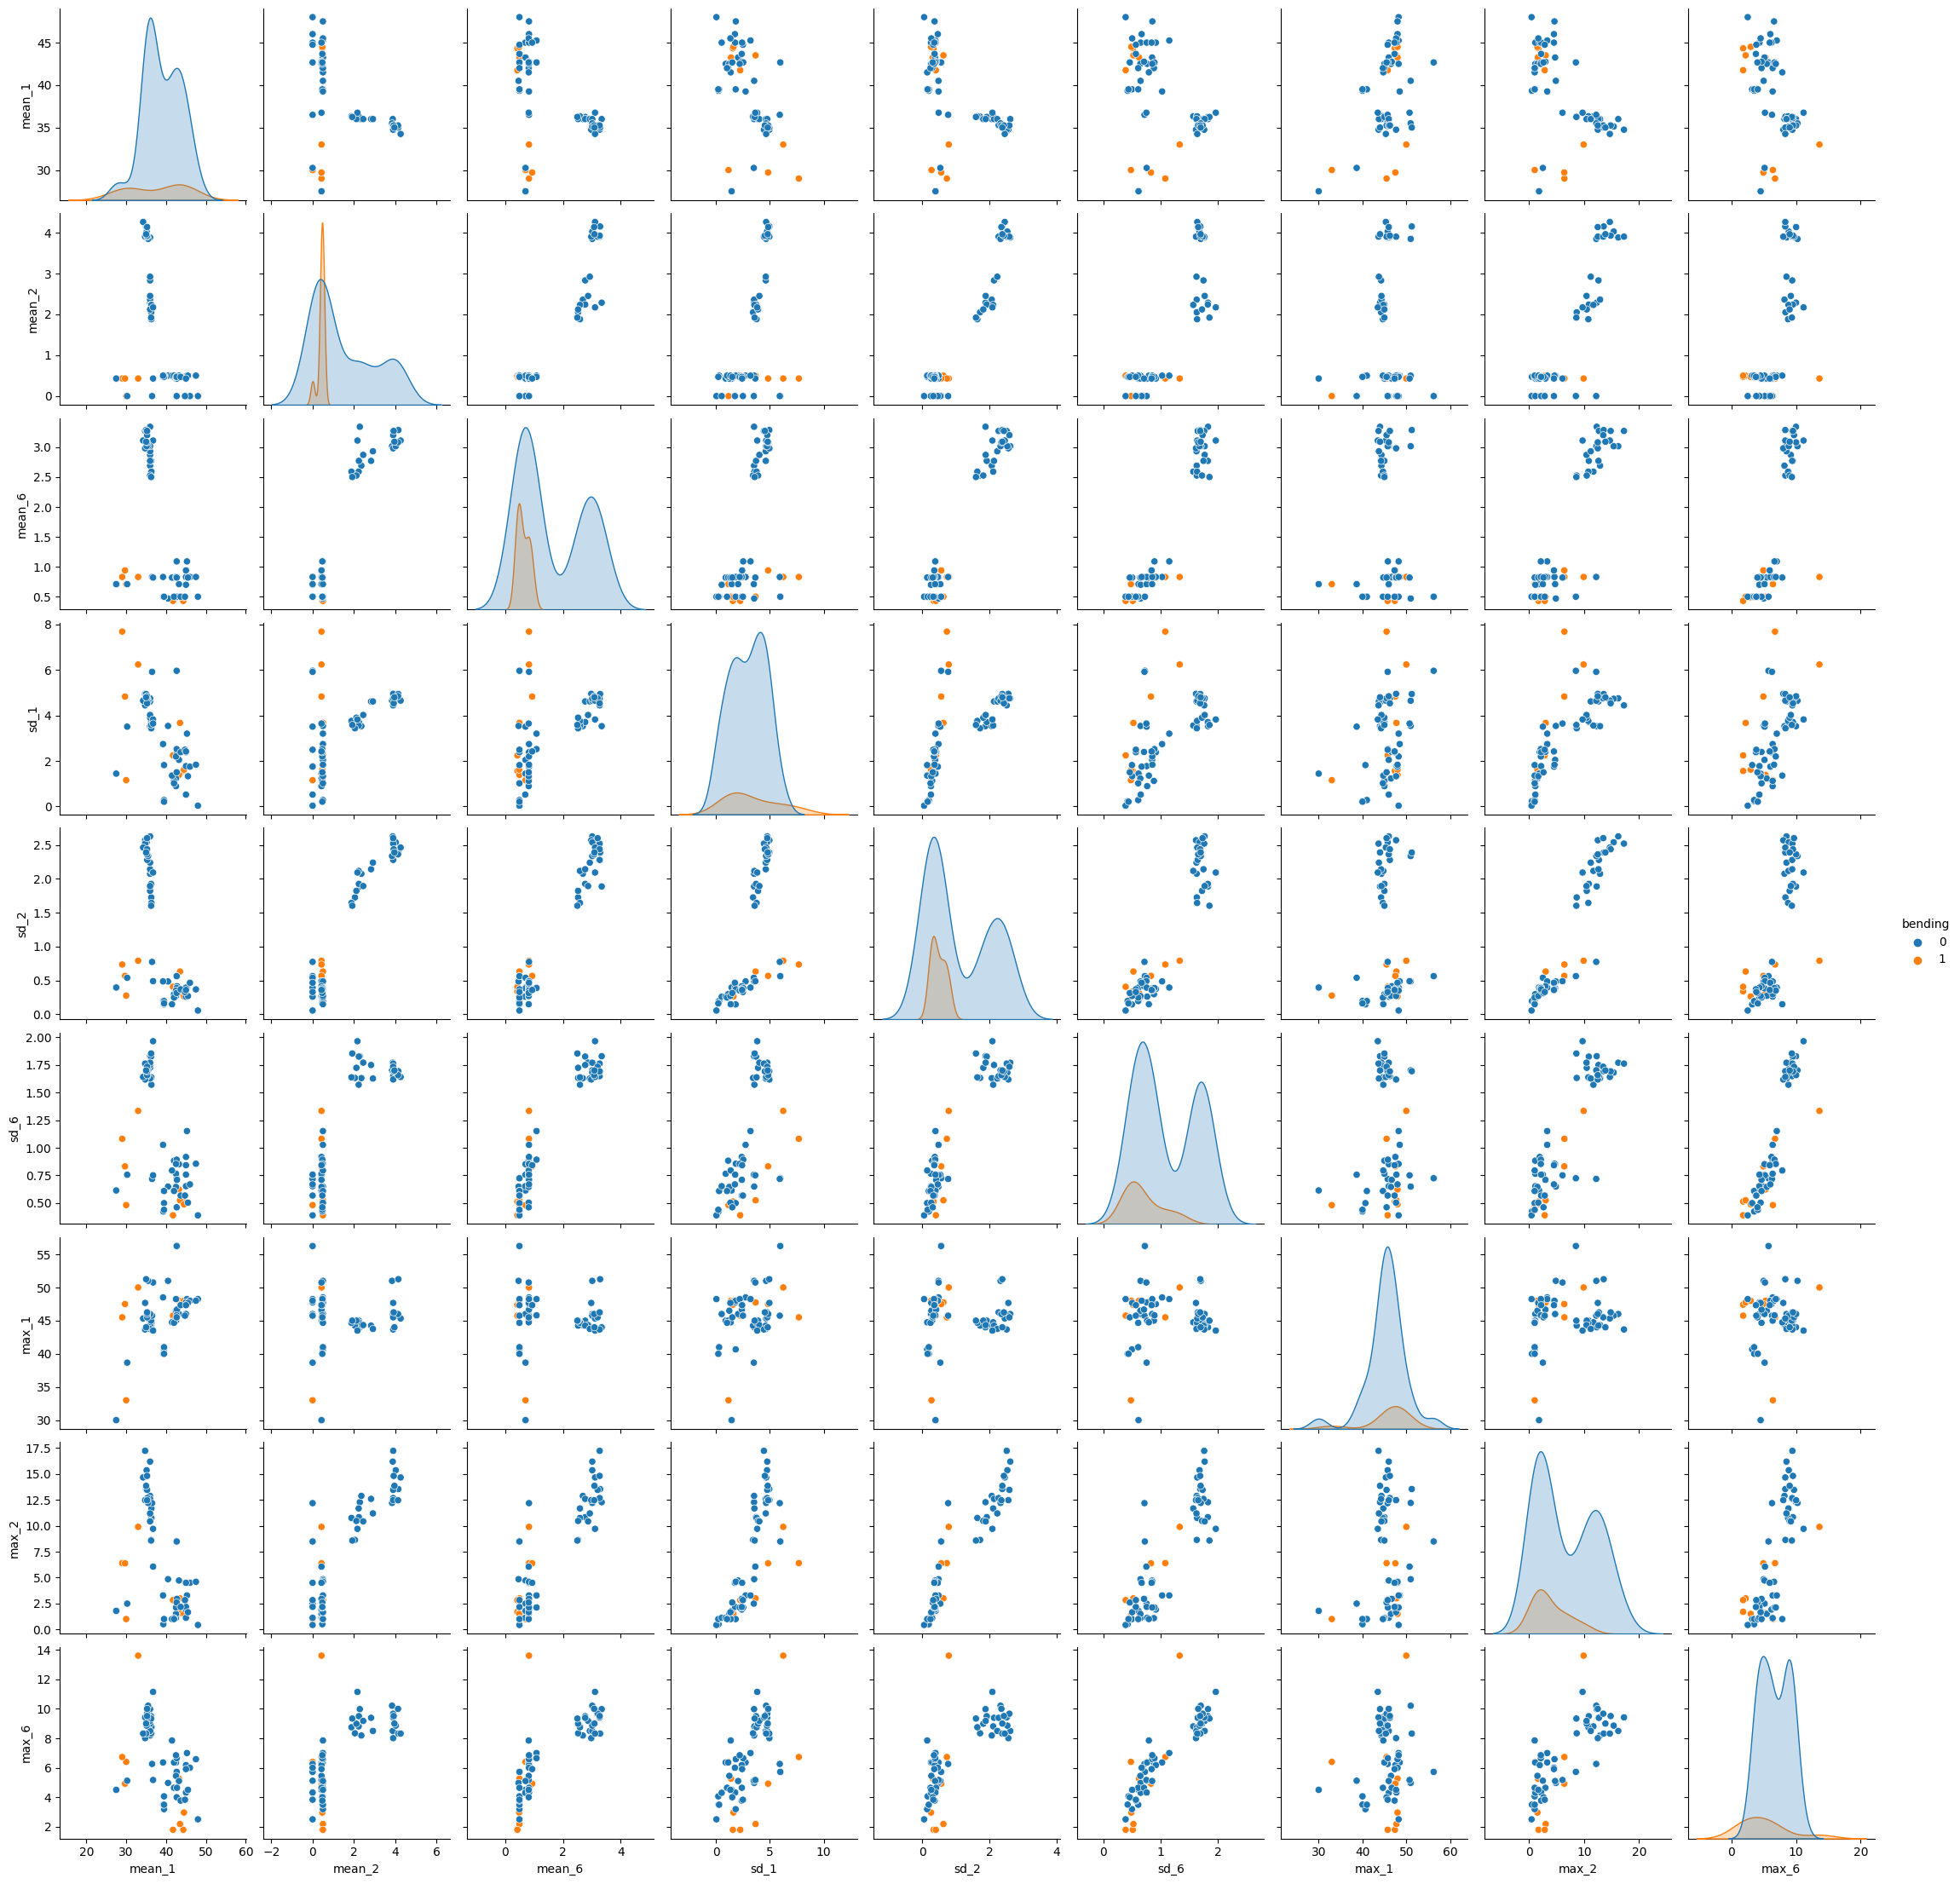

In [15]:
# only want series 1,2, 6 from training set
# features I want to use are mean, sd, max
column = []
column.append('bending')
wanted_series = [1,2,6]
wanted_features = ['mean', 'sd','max']
for feature in wanted_features:
    for serie in wanted_series:
        column.append(feature + '_' + str(serie))
selected_training_features = training_features_df_training[column]
sns.pairplot(selected_training_features, hue ='bending')
plt.show()

#### ii. Splitted Plots

In [16]:
#in order to break each time series into two, we would first take the midpoint and find the vals for the 0:midpoint then midpoint:
#splitting into first half midpoint = len(all_features_df_training) // 2
midpoint = len(training_features_df_training) // 2
training_features_df_training_1st = training_features_df_training[0:midpoint]
new_column = []
all_series= [1,2,3,4,5,6]
all_features = ['min', 'max', 'mean', 'median', 'sd', 'first_quart', 'third_quart']
for feature in all_features:
    for serie in all_series:
        new_column.append(feature + '_' + str(serie))

new_column.append('instance')
new_column.append('test')
new_column.append('bending')


training_features_df_training_1st = training_features_df_training_1st.set_axis(new_column, axis =1)
training_features_df_training_1st


,min_1,min_2,min_3,min_4,min_5,min_6,max_1,max_2,max_3,max_4,...,first_quart_6,third_quart_1,third_quart_2,third_quart_3,third_quart_4,third_quart_5,third_quart_6,instance,test,bending
0,35.00,0.0,6.50,0.0,29.00,0.0,47.40,1.70,29.75,4.44,...,0.0000,45.0000,0.5000,24.0000,0.8300,36.5000,0.9400,1,0,1
0,33.00,0.0,8.50,0.0,20.00,0.0,47.75,3.00,30.00,5.15,...,0.0000,45.0000,1.1200,24.3725,1.3000,36.3300,1.0000,2,0,1
0,33.00,0.0,3.00,0.0,23.67,0.0,45.75,2.83,28.25,6.42,...,0.0000,42.7500,0.7100,22.0625,1.1200,31.2500,0.5000,3,0,1
0,37.00,0.0,5.75,0.0,8.00,0.0,48.00,1.58,27.00,10.03,...,0.4300,45.0000,0.5000,18.2700,1.1200,24.0000,0.8700,4,0,1
0,36.25,0.0,1.50,0.0,11.33,0.0,48.00,1.50,26.33,5.17,...,0.0000,44.6700,0.5000,18.0000,0.9400,23.7500,0.8300,5,0,1
0,21.00,0.0,0.00,0.0,5.00,0.0,50.00,9.90,28.25,7.40,...,0.4700,34.5000,0.8225,18.0000,1.1200,23.5000,1.3000,6,0,1
0,27.50,0.0,0.00,0.0,11.00,0.0,33.00,1.00,14.50,4.44,...,0.4700,30.2700,0.4700,11.2500,0.7100,19.0000,0.9400,7,0,1
0,19.00,0.0,0.00,0.0,1.67,0.0,45.50,6.40,32.75,11.42,...,0.4700,38.0000,0.5000,20.6900,1.1200,20.8125,1.3000,8,0,1
0,25.00,0.0,2.00,0.0,0.00,0.0,47.50,6.38,28.33,5.32,...,0.5000,31.8125,0.5000,17.7500,1.1200,18.3125,1.3000,9,0,1
0,19.00,0.0,5.50,0.0,2.50,0.0,44.00,12.28,25.25,9.50,...,2.1025,39.0000,3.8450,17.5000,4.2175,18.0625,4.5500,10,0,0


In [17]:
#in order to break each time series into two we would divide each row by 2 and separating its column into two parts in order to preserve 88 rows.
#splitting into first half 
training_features_df_training_2nd = training_features_df_training[midpoint: ]
# display(all_features_df_training_2nd)
new_column_2 = []
all_series= [7,8,9,10,11,12]
all_features = ['min', 'max', 'mean', 'median', 'sd', 'first_quart', 'third_quart']
for feature in all_features:
    for serie in all_series:
        new_column_2.append(feature + '_' + str(serie))

new_column_2.append('instance')
new_column_2.append('test')
new_column_2.append('bending')

training_features_df_training_2nd = training_features_df_training_2nd.set_axis(new_column_2, axis =1)
training_features_df_training_2nd


,min_7,min_8,min_9,min_10,min_11,min_12,max_7,max_8,max_9,max_10,...,first_quart_12,third_quart_7,third_quart_8,third_quart_9,third_quart_10,third_quart_11,third_quart_12,instance,test,bending
0,25.50,0.0,1.00,0.0,5.50,0.00,45.75,12.19,24.00,5.12,...,0.4300,42.5000,0.8200,20.2700,0.9400,19.0000,1.1450,35,0,0
0,27.00,0.0,2.50,0.0,2.00,0.00,38.67,2.49,23.75,5.12,...,0.4300,37.0000,1.0000,21.0000,0.8700,20.7500,1.0000,36,0,0
0,27.50,0.0,1.50,0.0,0.00,0.00,50.75,6.06,23.25,6.02,...,0.4300,42.0000,0.5000,18.0000,0.8700,20.7500,1.0900,37,0,0
0,42.00,0.0,0.00,0.0,1.00,0.00,45.00,1.12,23.00,5.45,...,0.4300,43.5000,0.5000,20.0000,0.7100,19.0000,1.0900,38,0,0
0,41.75,0.0,0.00,0.0,5.67,0.00,46.50,1.50,21.67,4.64,...,0.4300,44.5000,0.5000,18.4250,0.7200,18.3300,1.0900,39,0,0
0,35.25,0.0,0.00,0.0,0.00,0.00,48.50,3.28,23.50,5.12,...,0.4700,42.5000,1.0000,18.2500,1.2200,19.7500,1.3000,40,0,0
0,28.50,0.0,0.00,0.0,1.50,0.00,48.25,3.28,24.25,6.98,...,0.5000,46.5000,0.7100,18.7500,1.4800,19.2500,1.7000,41,0,0
0,39.50,0.0,0.00,0.0,1.00,0.00,45.00,1.09,21.80,7.31,...,0.4700,42.0000,0.5000,14.7500,0.9550,17.2500,1.2200,42,0,0
0,39.67,0.0,0.00,0.0,0.00,0.00,44.75,1.00,22.75,5.68,...,0.4700,44.3300,0.5000,14.0000,1.2500,18.2500,1.0000,43,0,0
0,40.00,0.0,2.00,0.0,2.50,0.00,44.67,1.00,23.50,5.93,...,0.4300,43.2500,0.5000,15.0000,0.8300,22.0000,0.8300,44,0,0


C:\Users\19092\AppData\Local\Temp\ipykernel_29904\2387751480.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_training_features_split['bending'] = bending_vals


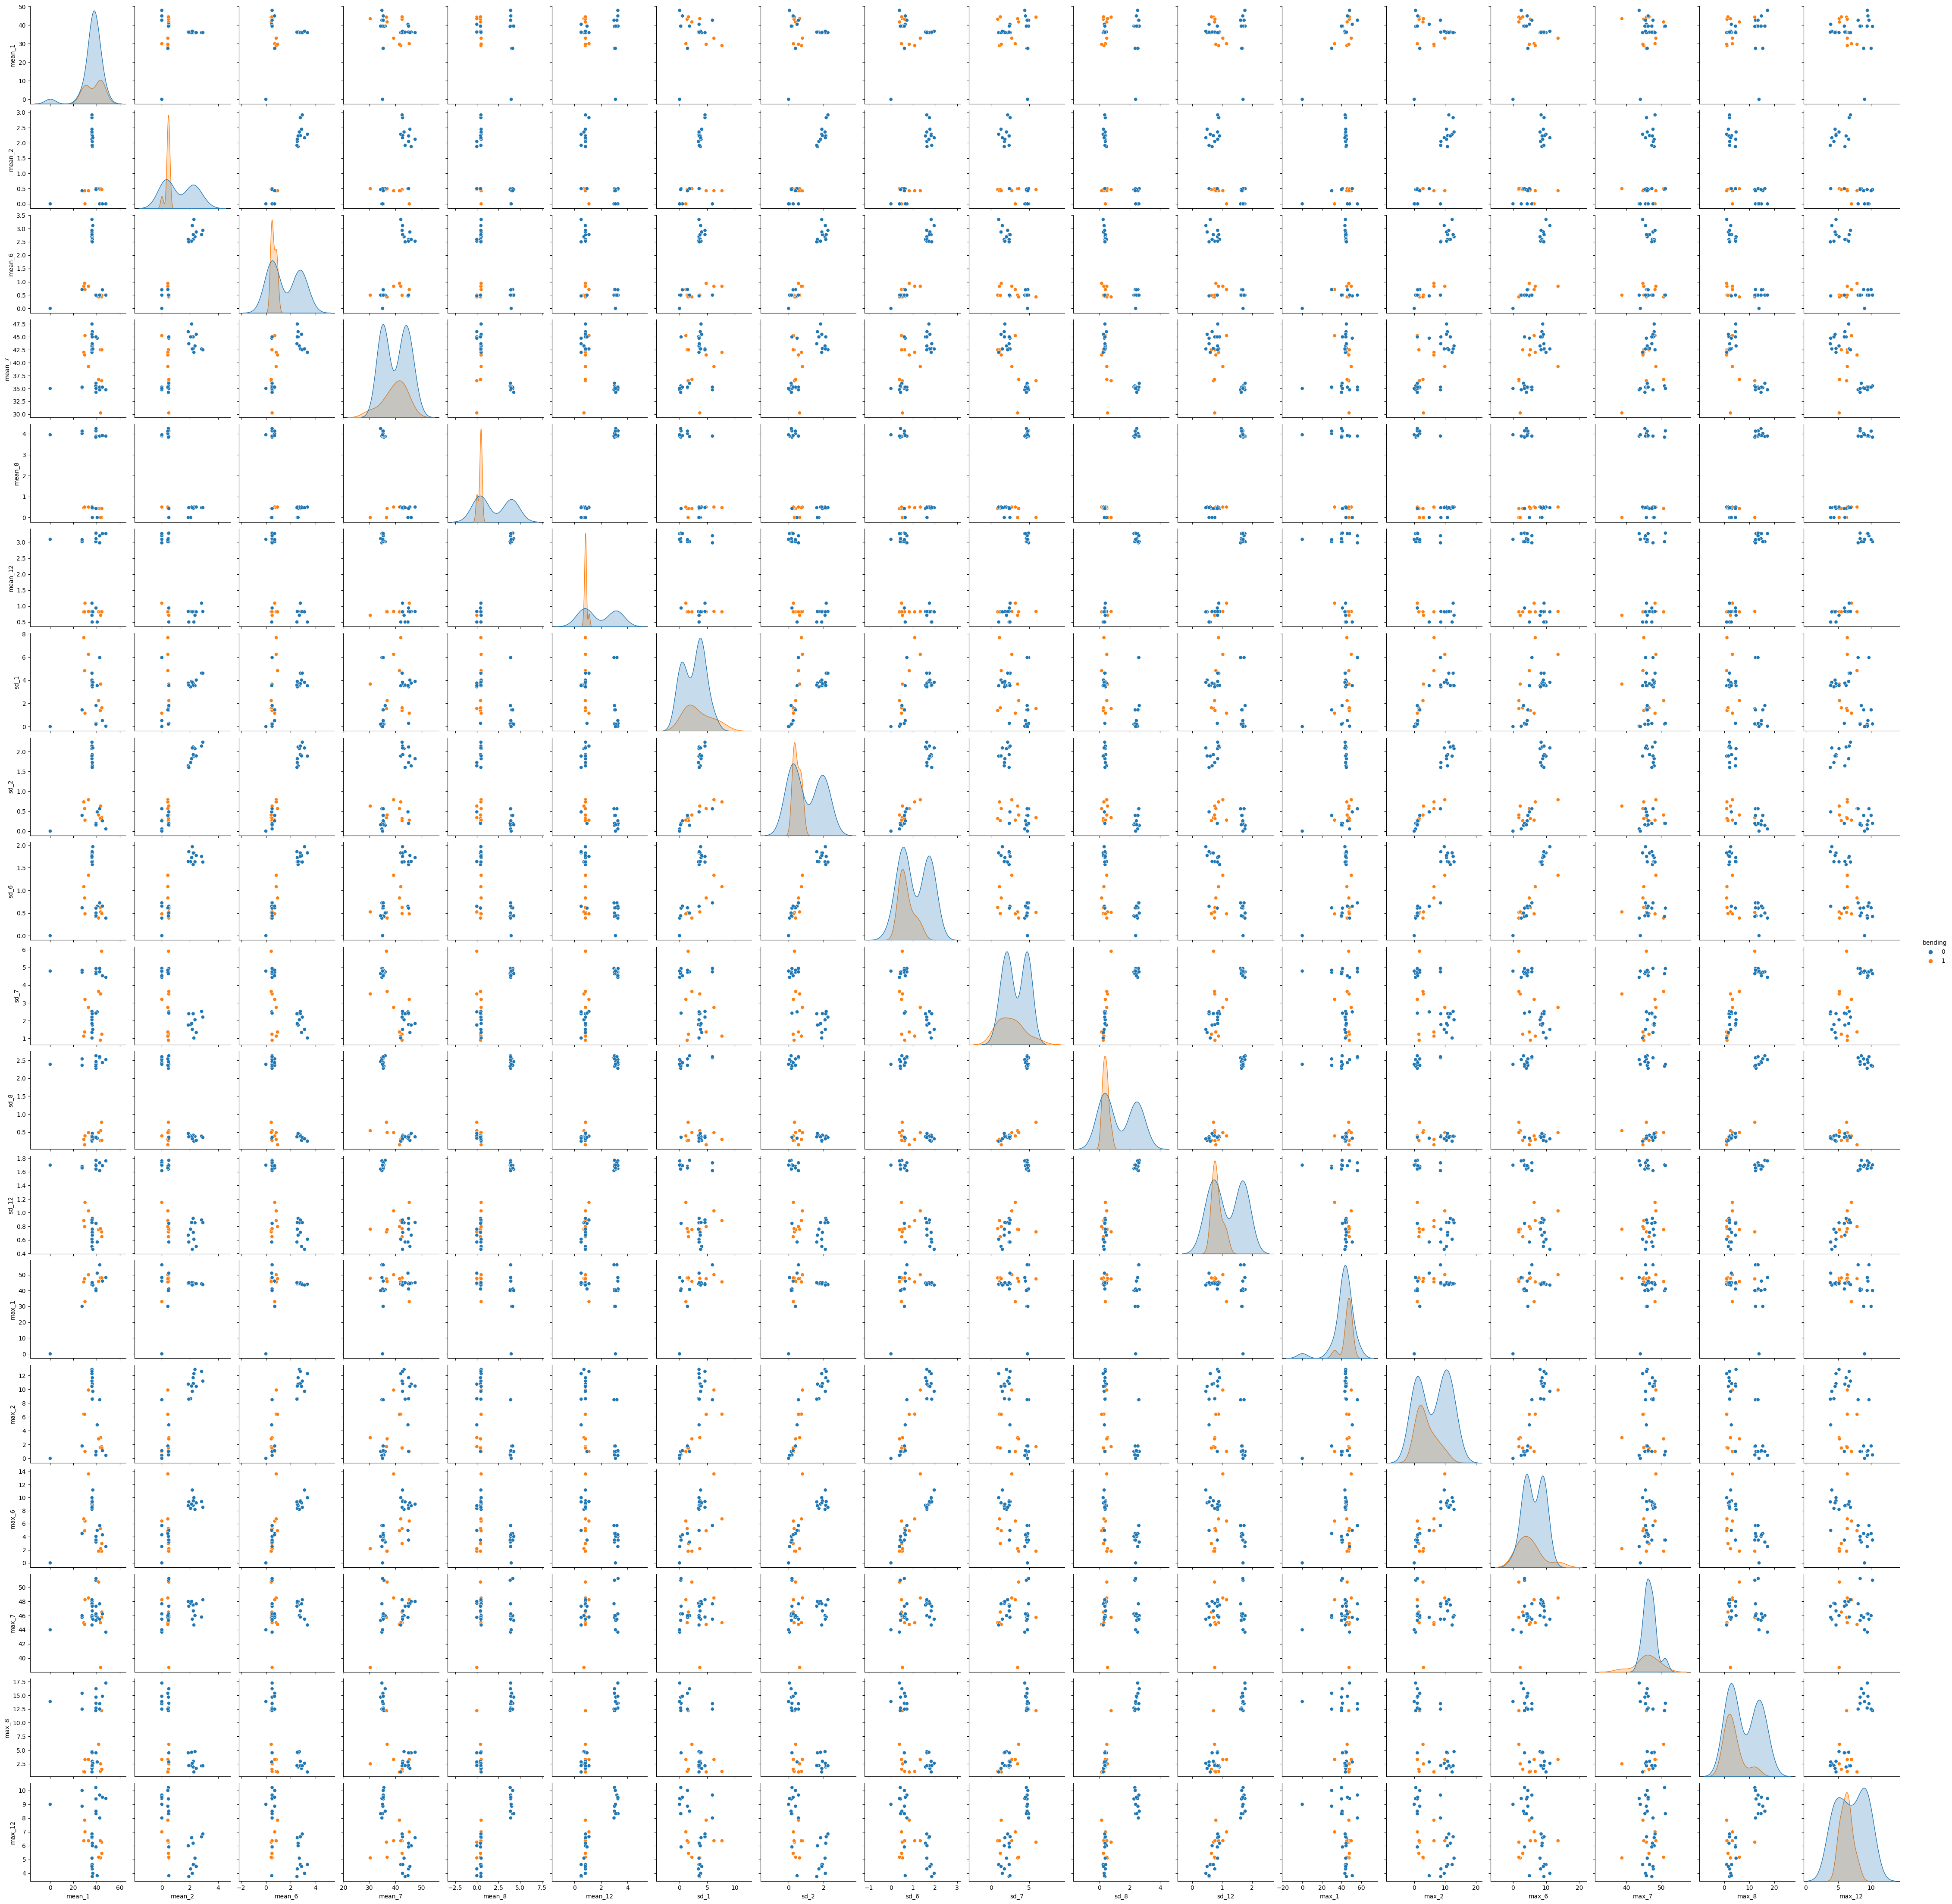

In [18]:
# final dataset would be 1st half and second half concatenated
# concatenation was from chatgpt as I was having issues correctly combining the two halves while maintaining the same number of instances
combined_all_features = pd.concat([training_features_df_training_2nd.reset_index(drop=True), training_features_df_training_1st.reset_index(drop=True)], axis=1, ignore_index=False)
combined_all_features.fillna(0, inplace=True)

half_instances = (len(training_features_df_instance)//2) + 1
bending_vals = [1] * 9 + [0] * (half_instances - 9)
# display(combined_all_features)

final_column = []
wanted_series = [1,2,6,7,8,12]
wanted_features = ['mean', 'sd','max']

for feature in wanted_features:
    for serie in wanted_series:
        final_column.append(feature + '_' + str(serie))
selected_training_features_split = combined_all_features[final_column]
selected_training_features_split['bending'] = bending_vals

# display(selected_training_features_split)

sns.pairplot(selected_training_features_split, hue ='bending')
plt.show()




We can see that the distributions between some of the variables are a lot different in this broken down time series than the one in 2a(i).

Break each time series in your training set into l ∈ {1, 2, . . . , 20} time series of approximately equal length and use logistic regression5 to solve the binary classification problem, using time-domain features. Remember that breaking each of the time series does not change the number of instances. It only changes the number of features for each instance. Calculate the p-values for your logistic regression parameters in each model corresponding to each value of l and refit a logistic regression model using your pruned set of features.

#### iii. Time Series Segments

In [19]:
# FOR ALL FEATURES
## this split function was written with the use of chatgpt ##
def split_time_series(df, l):
    num_rows = len(df) 

    all_series = [1, 2, 3, 4, 5, 6] 
    all_features = ['min', 'max', 'mean', 'median', 'sd', 'first_quart', 'third_quart']

    splits = []
    total_columns = len(all_series) * len(all_features) * l 

    for i in range(1, l + 1):
        split_df = pd.DataFrame(index=range(num_rows)) 

        for series_i, series in enumerate(all_series):
            for features_i, feature in enumerate(all_features):
                col_name = f'{feature}_series_{series}_split_{i}' 
                data = np.random.rand(num_rows)  
                split_df[col_name] = data  

        splits.append(split_df)

    concatenated_splits = pd.concat(splits, axis=1)
    concatenated_splits = concatenated_splits.iloc[:, :total_columns]

    split_training = concatenated_splits.copy()
    split_training['bending'] = bending_val

    x_training = split_training.iloc[:,:-1]
    y_training = split_training.iloc[:,- 1]
    # https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html to deal with imbalances
    # I was getting p = 1 for every l
    oversample = RandomOverSampler(sampling_strategy='auto',random_state=60)
    x_training_resampled, y_training_resampled = oversample.fit_resample(x_training,y_training)

    # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
    # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    validation = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 60)
    model = LogisticRegression(solver = 'lbfgs', max_iter=100)
    rfecv = RFECV(estimator = model, cv=validation, scoring = 'accuracy')
    rfecv.fit(x_training_resampled, y_training_resampled) 

    print(f'l = {l} with p: {rfecv.n_features_}')
    print(f" score = {np.max(rfecv.cv_results_['mean_test_score'])}")


l = list(range(1,21))
for i in l: 
    split_time_series(training_features_df_training, i)


l = 1 with p: 16
 score = 0.875
l = 2 with p: 43
 score = 0.9166666666666667
l = 3 with p: 71
 score = 0.9416666666666668
l = 4 with p: 38
 score = 0.975
l = 5 with p: 74
 score = 0.975
l = 6 with p: 88
 score = 0.9666666666666668
l = 7 with p: 131
 score = 0.9916666666666668
l = 8 with p: 49
 score = 0.975
l = 9 with p: 115
 score = 0.9666666666666668
l = 10 with p: 13
 score = 0.975
l = 11 with p: 92
 score = 0.975
l = 12 with p: 106
 score = 0.975
l = 13 with p: 108
 score = 0.975
l = 14 with p: 21
 score = 0.9833333333333334
l = 15 with p: 28
 score = 1.0
l = 16 with p: 10
 score = 0.9833333333333334
l = 17 with p: 30
 score = 0.975
l = 18 with p: 45
 score = 0.975
l = 19 with p: 158
 score = 0.975
l = 20 with p: 41
 score = 0.975


In [20]:
# FOR SELECTED FEATURES
## this split function was written with the use of chatgpt ##
def split_time_series(df, l):
    num_rows = len(df) 

    all_series = [1, 2, 3, 4, 5, 6] 
    wanted_features = ['max', 'mean', 'sd']
    splits = []
    total_columns = len(all_series) * len(wanted_features) * l 

    for i in range(1, l + 1):
        split_df = pd.DataFrame(index=range(num_rows)) 

        for series_i, series in enumerate(all_series):
            for features_i, feature in enumerate(wanted_features):
                col_name = f'{feature}_series_{series}_split_{i}' 
                data = np.random.rand(num_rows)  
                split_df[col_name] = data  

        splits.append(split_df)

    concatenated_splits = pd.concat(splits, axis=1)
    concatenated_splits = concatenated_splits.iloc[:, :total_columns]

    split_training = concatenated_splits.copy()
    split_training['bending'] = bending_val

    x_training = split_training.iloc[:,:-1]
    y_training = split_training.iloc[:,- 1]
    # https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html to deal with imbalances
    # I was getting p = 1 for every l
    oversample = RandomOverSampler(sampling_strategy='auto',random_state=60)
    x_training_resampled, y_training_resampled = oversample.fit_resample(x_training,y_training)

    validation = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 60)
    model = LogisticRegression(solver = 'lbfgs', max_iter=100)
    rfecv = RFECV(estimator = model, cv=validation, scoring = 'accuracy')
    rfecv.fit(x_training_resampled, y_training_resampled) 

    print(f'l = {l} with p: {rfecv.n_features_}')
    print(f" score = {np.max(rfecv.cv_results_['mean_test_score'])}")

l = list(range(1,21))
for i in l: 
    split_time_series(training_features_df_training, i)


l = 1 with p: 5
 score = 0.75
l = 2 with p: 19
 score = 0.85
l = 3 with p: 44
 score = 0.9416666666666668
l = 4 with p: 41
 score = 0.9583333333333334
l = 5 with p: 29
 score = 0.9333333333333333
l = 6 with p: 59
 score = 0.9166666666666666
l = 7 with p: 41
 score = 0.9666666666666668
l = 8 with p: 68
 score = 0.9583333333333334
l = 9 with p: 60
 score = 0.9583333333333334
l = 10 with p: 104
 score = 0.9333333333333332
l = 11 with p: 139
 score = 0.9583333333333334
l = 12 with p: 53
 score = 0.9666666666666668
l = 13 with p: 64
 score = 0.975
l = 14 with p: 70
 score = 0.975
l = 15 with p: 62
 score = 0.975
l = 16 with p: 36
 score = 0.975
l = 17 with p: 101
 score = 0.975
l = 18 with p: 32
 score = 0.975
l = 19 with p: 202
 score = 0.975
l = 20 with p: 47
 score = 0.975


We want to perform validation on both the selected set of predictors and the outcome. If we only performed cv on the selected set of predictors, the model will be too rigid as discussed in lecture.

We can see that the highest score was 0.975. Although there are multiple, the one with the lowest l value is l = 7 with p: 26. This was during my first run, but subsequent runs have changed values due to shuffles.

#### iv. Confusion Matrix

In [36]:
def data(data, l):
    num_rows = len(data) 

    all_series = [1, 2, 3, 4, 5, 6] 
    wanted_features = ['max', 'mean', 'sd']
    splits = []
    total_columns = len(all_series) * len(wanted_features) * l 

    for i in range(1, l + 1):
        split_df = pd.DataFrame(index=range(num_rows)) 

        for series_i, series in enumerate(all_series):
            for features_i, feature in enumerate(wanted_features):
                col_name = f'{feature}_series_{series}_split_{i}' 
                data = np.random.rand(num_rows)  
                split_df[col_name] = data  

        splits.append(split_df)

    concatenated_splits = pd.concat(splits, axis=1)
    concatenated_splits = concatenated_splits.iloc[:, :total_columns]

    split_training = concatenated_splits.copy()
    split_training['bending'] = bending_val

    x_training = split_training.iloc[:,:-1]
    y_training = split_training.iloc[:,- 1]
    
    oversample = RandomOverSampler(sampling_strategy='auto',random_state=60)
    x_training_resampled, y_training_resampled = oversample.fit_resample(x_training,y_training)

    return x_training_resampled, y_training_resampled


x_resampled1, y_resampled1 = data(training_features_df_training,7)

model = LogisticRegression(solver = 'lbfgs', max_iter=100)
rfe = RFE(model, n_features_to_select= 26)
rfe.fit(x_resampled1, y_resampled1)
y_pred = rfe.predict(x_resampled1)
confusion = confusion_matrix(y_resampled1, y_pred)
print(confusion)
# [60,0]
# [0, 60] because I resampled 

[[60  0]
 [ 0 60]]


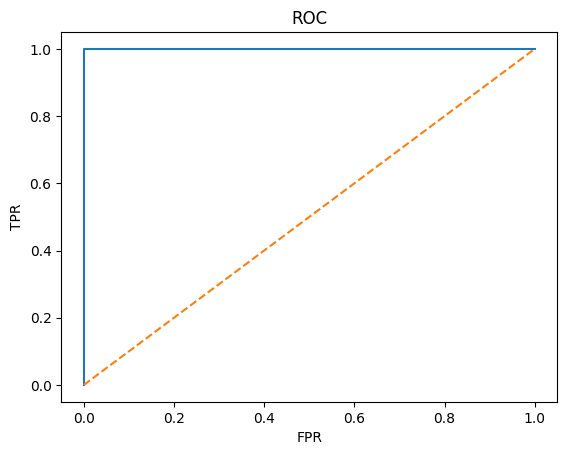

In [37]:
#https://www.geeksforgeeks.org/how-to-plot-roc-curve-in-python/
false_pos, true_pos, boundary = roc_curve(y_resampled1, rfe.predict_proba(x_resampled1)[:,1])
plt.figure()
plt.plot(false_pos, true_pos)
plt.plot([0, 1], [0, 1],'--')
plt.title('ROC')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()


In [38]:
selected_col = x_resampled1.columns[rfe.support_]
final_x_resampled1 = x_resampled1.loc[:, selected_col]
logitmodel1 = sm.Logit(y_resampled1,final_x_resampled1)
fit_model1 = logitmodel1.fit(method = 'lbfgs')
print(fit_model1.summary())

                           Logit Regression Results                           
Dep. Variable:                bending   No. Observations:                  120
Model:                          Logit   Df Residuals:                       94
Method:                           MLE   Df Model:                           25
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:                   1.000
Time:                        22:30:14   Log-Likelihood:             -0.0037991
converged:                       True   LL-Null:                       -83.178
Covariance Type:            nonrobust   LLR p-value:                 7.680e-23
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
sd_series_4_split_1       4.7403    280.470      0.017      0.987    -544.971     554.452
sd_series_6_split_1     -13.3332    349.892     -0.038      0.970    -699.109     672.443
mean_ser

#### v. Test Classifier

In [39]:
# FOR SELECTED FEATURES
total_instances_test = len(test_features_df_instance)
bending_val = [1] * 9 + [0] * (total_instances_test - 9)
test_features_df_test = test_features_df_instance
test_features_df_test['bending'] = bending_val

def split_time_series_test(df, l):
    num_rows = len(df) 

    all_series = [1, 2, 3, 4, 5, 6] 
    wanted_features = ['max', 'mean', 'sd']
    splits = []
    total_columns = len(all_series) * len(wanted_features) * l 

    for i in range(1, l + 1):
        split_df = pd.DataFrame(index=range(num_rows)) 

        for series_i, series in enumerate(all_series):
            for features_i, feature in enumerate(wanted_features):
                col_name = f'{feature}_series_{series}_split_{i}' 
                data = np.random.rand(num_rows)  
                split_df[col_name] = data  

        splits.append(split_df)

    concatenated_splits = pd.concat(splits, axis=1)
    concatenated_splits = concatenated_splits.iloc[:, :total_columns]
    
    split_training = concatenated_splits.copy()
    split_training['bending'] = bending_val

    x_test = split_training.iloc[:,:-1]
    y_test = split_training.iloc[:,- 1]

    return x_test, y_test

x_test, y_test = split_time_series_test(test_features_df_test,7)



In [40]:
test_model = LogisticRegression(solver = 'lbfgs', max_iter= 1000)
rfe = RFE(model, n_features_to_select= 26)
rfe.fit(x_test, y_test.values.ravel())
y_test_pred = rfe.predict(x_test)
print(rfe.score(x_test, y_test))

#score is 1.0 same as before

1.0


#### vi. Separation

Yes my classes do seem to be well separated to cause instability in calculating logistic regression parameters.


#### vii. Imbalance

There are no imbalanced classes in my confusion matrix due to resampling. Otherwise, I know imbalance exists because there are 60 No's for 9 Yes's in the bending column.

In [26]:
# I resampled my original, so will use SMOTE instead to compare results hopefully this is okay.
total_instances = len(training_features_df_instance)
bending_val = [1] * 9 + [0] * (total_instances - 9)
training_features_df_training = training_features_df_instance
training_features_df_training['bending'] = bending_val
# FOR SELECTED FEATURES
def split_time_series(df, l):
    num_rows = len(df) 

    all_series = [1, 2, 3, 4, 5, 6] 
    wanted_features = ['max', 'mean', 'sd']
    splits = []
    total_columns = len(all_series) * len(wanted_features) * l 

    for i in range(1, l + 1):
        split_df = pd.DataFrame(index=range(num_rows)) 

        for series_i, series in enumerate(all_series):
            for feature_i, feature in enumerate(wanted_features):
                col_name = f'{feature}_series_{series}_split_{i}' 
                data = np.random.rand(num_rows)  
                split_df[col_name] = data  

        splits.append(split_df)

    concatenated_splits = pd.concat(splits, axis=1)
    concatenated_splits = concatenated_splits.iloc[:, :total_columns]

    split_training = concatenated_splits.copy()
    split_training['bending'] = bending_val

    x_training = split_training.iloc[:,:-1]
    y_training = split_training.iloc[:,- 1]
    # https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html to deal with imbalances
    # I was getting p = 1 for every l
    smote = SMOTE(sampling_strategy='auto',random_state=60)
    x_training_resampled, y_training_resampled = smote.fit_resample(x_training,y_training)

    validation = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 60)
    model = LogisticRegression(solver = 'lbfgs', max_iter=100)
    rfecv = RFECV(estimator = model, cv=validation, scoring = 'accuracy')
    rfecv.fit(x_training_resampled, y_training_resampled) 

    print(f'l = {l} with p: {rfecv.n_features_}')
    print(f" score = {np.max(rfecv.cv_results_['mean_test_score'])}")

l = list(range(1,21))
for i in l: 
    split_time_series(training_features_df_training, i)


l = 1 with p: 4
 score = 0.8416666666666666
l = 2 with p: 29
 score = 0.8583333333333334
l = 3 with p: 19
 score = 0.925
l = 4 with p: 23
 score = 0.9583333333333334
l = 5 with p: 46
 score = 0.9083333333333332
l = 6 with p: 34
 score = 0.9666666666666668
l = 7 with p: 47
 score = 0.95
l = 8 with p: 45
 score = 0.9666666666666668
l = 9 with p: 32
 score = 0.9833333333333334
l = 10 with p: 90
 score = 0.975
l = 11 with p: 59
 score = 0.9833333333333332
l = 12 with p: 121
 score = 1.0
l = 13 with p: 27
 score = 1.0
l = 14 with p: 148
 score = 0.9916666666666668
l = 15 with p: 28
 score = 1.0
l = 16 with p: 80
 score = 1.0
l = 17 with p: 85
 score = 1.0
l = 18 with p: 98
 score = 1.0
l = 19 with p: 254
 score = 0.975
l = 20 with p: 169
 score = 1.0


In [33]:
def data(data, l):
    num_rows = len(data) 

    all_series = [1, 2, 3, 4, 5, 6] 
    wanted_features = ['max', 'mean', 'sd']
    splits = []
    total_columns = len(all_series) * len(wanted_features) * l 

    for i in range(1, l + 1):
        split_df = pd.DataFrame(index=range(num_rows)) 

        for series_i, series in enumerate(all_series):
            for features_i, feature in enumerate(wanted_features):
                col_name = f'{feature}_series_{series}_split_{i}' 
                data = np.random.rand(num_rows)  
                split_df[col_name] = data  

        splits.append(split_df)

    concatenated_splits = pd.concat(splits, axis=1)
    concatenated_splits = concatenated_splits.iloc[:, :total_columns]

    split_training = concatenated_splits.copy()
    split_training['bending'] = bending_val

    x_training = split_training.iloc[:,:-1]
    y_training = split_training.iloc[:,- 1]
    
    smote = SMOTE(sampling_strategy='auto',random_state=60)
    x_training_resampled, y_training_resampled = smote.fit_resample(x_training,y_training)

    return x_training_resampled, y_training_resampled


x_resampled, y_resampled = data(training_features_df_training,7)

model = LogisticRegression(solver = 'lbfgs', max_iter=100)
rfe = RFE(model, n_features_to_select= 26)
rfe.fit(x_resampled, y_resampled)
y_pred = rfe.predict(x_resampled)
confusion = confusion_matrix(y_resampled, y_pred)
print(confusion)
# [60,0]
# [0, 60] because I resampled 

[[60  0]
 [ 0 60]]


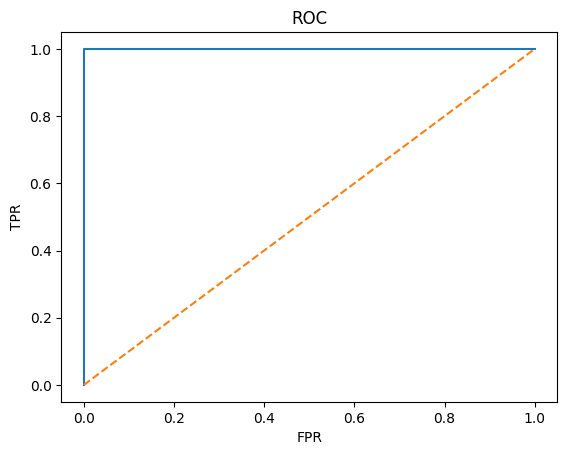

In [34]:
false_pos, true_pos, boundary = roc_curve(y_resampled, rfe.predict_proba(x_resampled)[:,1])
plt.figure()
plt.plot(false_pos, true_pos)
plt.plot([0, 1], [0, 1],'--')
plt.title('ROC')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [35]:
selected_col = x_resampled.columns[rfe.support_]
final_x_resampled = x_resampled.loc[:, selected_col]
logitmodel = sm.Logit(y_resampled,final_x_resampled)
fit_model = logitmodel.fit(method = 'lbfgs')
print(fit_model.summary())



                           Logit Regression Results                           
Dep. Variable:                bending   No. Observations:                  120
Model:                          Logit   Df Residuals:                       94
Method:                           MLE   Df Model:                           25
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:                  0.9999
Time:                        22:30:03   Log-Likelihood:             -0.0050297
converged:                       True   LL-Null:                       -83.178
Covariance Type:            nonrobust   LLR p-value:                 7.688e-23
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
max_series_1_split_1      2.8844    841.599      0.003      0.997   -1646.619    1652.388
mean_series_2_split_1     3.1686    722.941      0.004      0.997   -1413.770    1420.107
sd_serie

### (b) Binary Classification Using L1-penalized logistic regression

#### i. Time Series Segments

In [30]:
# FOR SELECTED FEATURES
def split_time_series(df, l):
    num_rows = len(df) 

    all_series = [1, 2, 3, 4, 5, 6] 
    wanted_features = ['max', 'mean', 'sd']
    splits = []
    total_columns = len(all_series) * len(wanted_features) * l 

    for i in range(1, l + 1):
        split_df = pd.DataFrame(index=range(num_rows)) 

        for series_i, series in enumerate(all_series):
            for feature_i, feature in enumerate(wanted_features):
                col_name = f'{feature}_series_{series}_split_{i}' 
                data = np.random.rand(num_rows)  
                split_df[col_name] = data  

        splits.append(split_df)

    concatenated_splits = pd.concat(splits, axis=1)
    concatenated_splits = concatenated_splits.iloc[:, :total_columns]

    split_training = concatenated_splits.copy()
    split_training['bending'] = bending_val

    x_training = split_training.iloc[:,:-1]
    y_training = split_training.iloc[:,- 1]
   
    oversample = RandomOverSampler(sampling_strategy='auto',random_state=60)
    x_training_resampled, y_training_resampled = oversample.fit_resample(x_training,y_training)

    validation = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 60)

    param_grid = {
    'estimator__C': [0.01, 0.1, 1, 10, 100], 
    }
    model = LogisticRegression(solver = 'liblinear', max_iter=1000, penalty= 'l1')
    rfecv = RFECV(estimator = model, scoring = 'accuracy')
    # Implementing Gridsearch here to cross validate for both l and lambda
    # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
    grid_search = GridSearchCV(estimator= rfecv, param_grid=param_grid, scoring= 'accuracy', cv = validation)
    grid_search.fit(x_training_resampled, y_training_resampled.values.ravel()) 

    best_model = grid_search.best_estimator_
    p = best_model.n_features_

    score = grid_search.best_score_

    # Print the results
    print(f'l = {i} with p: {p}')
    print(f'score = {score}')

l = list(range(1,21))
for i in l: 
    split_time_series(training_features_df_training, i)


l = 1 with p: 13
score = 0.825
l = 2 with p: 6
score = 0.9166666666666666
l = 3 with p: 29
score = 0.8583333333333334
l = 4 with p: 18
score = 0.9166666666666666
l = 5 with p: 26
score = 0.9416666666666668
l = 6 with p: 6
score = 0.925
l = 7 with p: 27
score = 0.9
l = 8 with p: 18
score = 0.875
l = 9 with p: 25
score = 0.875
l = 10 with p: 6
score = 0.9083333333333334
l = 11 with p: 131
score = 0.9
l = 12 with p: 24
score = 0.95
l = 13 with p: 11
score = 0.9
l = 14 with p: 219
score = 0.9416666666666667
l = 15 with p: 20
score = 0.9166666666666666
l = 16 with p: 240
score = 0.95
l = 17 with p: 15
score = 0.95
l = 18 with p: 155
score = 0.9083333333333334
l = 19 with p: 21
score = 0.925
l = 20 with p: 322
score = 0.9083333333333334


#### ii. Comparison

We can see the highest score we got was ~0.9417 with l= 10, which is worse than the results from 2a(iii). L1 is also harder to implement as you have to cross validate for both l and lambda.

### (c) Multi-class Classification (The Realistic Case)

#### i. Time Series Segments

In [31]:
# Ran out of time to finish this question due to midterm.

#### ii. Naive Bayes

In [32]:
# Ran out of time to finish this question due to midterm.

#### ii. Comparison

We know that Naive Bayes classifier has a higher bias but lower variance compared to logistic regression. I would say multinomial l1 regression is better in this case as feature selection is important and can better handle correlated features.

## 3. ISLR 4.8.3

FOUND IN SEPARATE PDF

## 4. ISLR 4.8.7

FOUND IN SEPARATE PDF